In [1]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import torch
from numpy import random as rand
import torchio as tio
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from typing import Union, Tuple, List
import matplotlib.pyplot as plt
import PIL
import PIL.Image as Image

In [2]:
"Need to specify the local path on computer"
dir_path = "../Task3/"
imgs = []

In [77]:
class Set(Dataset):
    def __init__(self, data_path, to_tensor = True):
        self.data_path = data_path
        self.sub_folders = sorted([folder for folder in os.listdir(self.data_path) if os.path.isdir(os.path.join(self.data_path, folder))])
        self.to_tensor = to_tensor 
    def get_folder_content(self, index):
        sub_folder = os.path.join(self.data_path, self.sub_folders[index])
        print(sub_folder)
        data = sorted([name for name in os.listdir(sub_folder) if os.path.isfile(os.path.join(sub_folder,name)) and 'masked' in name])
        seg = sorted([name for name in os.listdir(sub_folder) if os.path.isfile(os.path.join(sub_folder,name)) and 'Lacunes' in name])
        return data, seg
    def __getitem__(self, index):
        path = os.path.join(self.data_path, self.sub_folders[index])
        data, seg = self.get_folder_content(index)
        sample = {}
        data = []
        seg = []
        print(data)
        for elm in data:
            npy_data = nib.load(os.path.join(path,elm))
            tmp = npy_data.get_fdata()
            print(tmp.shape)
            data.append(tmp)
            print(npy_data.shape)
            print(type(npy_data))
        print(len(data))
        for elm in seg:
            npy_data = nib.load(os.path.join(path,elm))
            sample['seg'].append(npy_data.get_fdata())
            print(npy_data.shape)
            print(type(npy_data))
        return sample
        

In [78]:
data_set = Set(dir_path)
data, seg= data_set.get_folder_content(1)
print(data)
print(seg)
sample = data_set.__getitem__(1)


../Task3/sub-102
['sub-102_space-T1_desc-masked_FLAIR.nii.gz', 'sub-102_space-T1_desc-masked_T1.nii.gz', 'sub-102_space-T1_desc-masked_T2.nii.gz']
['sub-102_space-T1_desc-Rater1_Lacunes.nii.gz', 'sub-102_space-T1_desc-Rater2_Lacunes.nii.gz']
../Task3/sub-102
[]
0


TypeError: 'NoneType' object is not subscriptable

In [95]:
"Loads images from the folder sub-101"
for folder in os.listdir(dir_path):
    print(folder)
    if (folder == '.DS_Store'):
        continue
    f = folder + '/'
    labels = []
    images = []
    for img in os.listdir(dir_path + f):
        if (img == '.DS_Store'):
            continue
        img = nib.load(dir_path + f + img)
        img = img.get_fdata()
        if ('Lacunes' in img):
            labels.append[img]
        else:
            images.append(img)
sample = {'data': images,
            'seg' : labels}


sub-213


/var/folders/3w/1bt6kg417v1f847hhspy_pjr0000gn/T/ipykernel_42435/2850543722.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ('Lacunes' in img):


sub-214
sub-222
sub-225
sub-224
sub-223
sub-215
sub-212
sub-101
.DS_Store
sub-106
sub-230
sub-208
sub-201
sub-206
sub-207
sub-209
sub-231
sub-217
sub-228
sub-210
sub-226
sub-219
sub-221
sub-220
sub-227
sub-218
sub-211
sub-216
sub-229
sub-105
sub-102
sub-103
sub-104
sub-234
sub-233
sub-205
sub-202
sub-203
sub-204
sub-232


In [100]:

loader = DataLoader((sample['data'], sample['seg']), batch_size=2)
print(len(loader))

AttributeError: 'list' object has no attribute 'shape'

In [65]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
def slicing(img):
    slice_0 = img[0][100, :, :]
    slice_1 = img[0][:, 150, :]
    slice_2 = img[0][:, :, 80]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle("Center slices for EPI image") 
    plt.show()

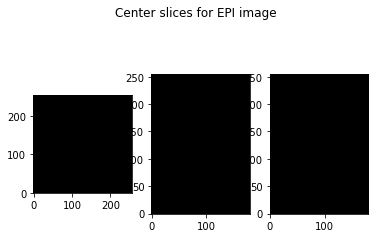

In [66]:
for img in imgs:
    slicing(img)

In [69]:
"Simple neural network with one convolution and activation"
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = self._conv_layer_set(1, 32)
        self.conv2 = self._conv_layer_set(32,64)
        self.maxpool = nn.MaxPool3d(kernel_size=1)
        self.conv3 = self._conv_layer_set(64,1, nn.Sigmoid())
        
    def _conv_layer_set(self, in_c, out_c, activation = nn.ReLU()):
            conv_layer = nn.Sequential(
            nn.Conv3d(in_c, out_c, 1),
            activation,
            )
            return conv_layer

    def forward(self, x):
        x = x.float()
        print('1st convolution')
        out = self.conv1(x)
        print(out.shape)
        out=self.conv2(out)
        out=self.maxpool(out)
        out = self.conv3(out)
        return out

In [70]:
model = CNN()
tmp = next(iter(loader))
print(tmp.shape)
for i, x in enumerate(loader):
    inp = x
    print(x.shape)
    out = model(x)

pred = model(next(iter(loader)))

torch.Size([1, 1, 180, 256, 256])
torch.Size([1, 1, 180, 256, 256])
1st convolution
torch.Size([1, 32, 180, 256, 256])
1st convolution
torch.Size([1, 32, 180, 256, 256])


In [61]:
print(pred.shape)
pred = pred.detach().numpy()


torch.Size([1, 1, 180, 256, 256])


In [62]:
tmp = pred
print(tmp[0][0])

[[[0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  ...
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]]

 [[0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  ...
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]]

 [[0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136 ... 0.4796136 0.4796136 0.4796136]
  [0.4796136 0.4796136 0.4796136

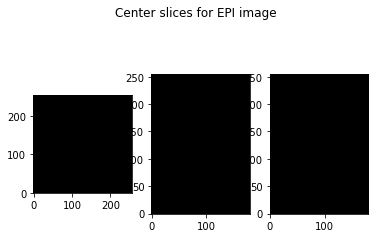

In [63]:
slice_0 = tmp[0][0][100, :, :]
slice_1 = tmp[0][0][:, 150, :]
slice_2 = tmp[0][0][:, :, 80]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 
plt.show()


In [33]:
print(img.shape)

(180, 256, 256)
